# <center> Analyse de la concentration de CO2 <center>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"    
# ‘all’|’last’|’last_expr’|’none’
#https://jupyter-console.readthedocs.io/en/4.0.1/config_options.html
pd.options.display.max_rows = 15

Nous récupérons les données les plus récentes sur le site en pointant sur un fichier au format .csv, si cette récupération est possible nous enregistrons une copie de ce fichier. Si pour une raison quelconque nous n'arrivons pas à faire ce téléchargement, nous travaillons sur les dernières données téléchargé.

In [2]:
try:
    raw_data = pd.read_csv("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/"
                           "in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv",skiprows=56)
except OSError as err:
    print("Erreur lors du téléchargement : {0}".format(err))
    print("Nous téléchargeons les dernières données enregistrer sur notre PC")
    raw_data = pd.read_csv("monthly_in_situ_co2_mlo")
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise
else:
    raw_data.to_csv('monthly_in_situ_co2_mlo',index=True)

print(raw_data.shape)
raw_data

(756, 10)


Excel                 [ppm]      [ppm]         [ppm]  \
0    1958    1     21200   1958.0411    -99.99      -99.99       -99.99   
1    1958    2     21231   1958.1260    -99.99      -99.99       -99.99   
2    1958    3     21259   1958.2027    315.70      314.44       316.19   
3    1958    4     21290   1958.2877    317.45      315.16       317.30   
4    1958    5     21320   1958.3699    317.51      314.71       317.86   
5    1958    6     21351   1958.4548    -99.99      -99.99       317.24   
6    1958    7     21381   1958.5370    315.86      315.19       315.86   
..    ...  ...       ...         ...       ...         ...          ...   
749  2020    6     43997   2020.4563    -99.99      -99.99       -99.99   
750  2020    7     44027   2020.5383    -99.99      -99.99       -99.99   
751  2020    8     44058   2020.6230    -99.99      -99.99       -99.99   
752  2020    9     44089   2020.7077    -99.99      -99.99       -99.99   
753  2020   10     44119   2020.7896    -99.99      -99.99       -99.99   
754  2020   11     44150   2020.8743    -99.99      -99.99       -99.99   
755  2020   12     44180   2020.9563    -99.99      -99.99       -99.99   

         [ppm]         [ppm]      [ppm].1  
0       -99.99        -99.99       -99.99  
1       -99.99        -99.99       -99.99  
2       314.91        315.70       314.44  
3       314.99        317.45       315.16  
4       315.06        317.51       314.71  
5       315.14        317.24       315.14  
6       315.22        315.86       315.19  
..         ...           ...          ...  
749     -99.99        -99.99       -99.99  
750     -99.99        -99.99       -99.99  
751     -99.99        -99.99       -99.99  
752     -99.99        -99.99       -99.99  
753     -99.99        -99.99       -99.99  
754     -99.99        -99.99       -99.99  
755     -99.99        -99.99       -99.99  

[756 rows x 10 columns]

Nous voyons que les noms des colonnes ne sont pas très représentatives, nous modifions  les noms des colonnes. Les données vide sont représentés par la valeur -99.99, nous remplaçons cette valeur par une valeur plus adéquate NaN dans une autre DataFrame

In [3]:
raw_data_1 = raw_data.copy()
print(raw_data.columns)
raw_data_1.columns = ['Yr','Mn','Date 1','Date 2','s1','s2','s3','s4','s5','s6']
raw_data_1

Index(['    ', '   ', '   Excel', '          ', '   [ppm]', '    [ppm] ',
       '      [ppm]', '    [ppm]', '       [ppm]', '    [ppm].1'],
      dtype='object')


Yr  Mn  Date 1     Date 2      s1      s2      s3      s4      s5  \
0    1958   1   21200  1958.0411  -99.99  -99.99  -99.99  -99.99  -99.99   
1    1958   2   21231  1958.1260  -99.99  -99.99  -99.99  -99.99  -99.99   
2    1958   3   21259  1958.2027  315.70  314.44  316.19  314.91  315.70   
3    1958   4   21290  1958.2877  317.45  315.16  317.30  314.99  317.45   
4    1958   5   21320  1958.3699  317.51  314.71  317.86  315.06  317.51   
5    1958   6   21351  1958.4548  -99.99  -99.99  317.24  315.14  317.24   
6    1958   7   21381  1958.5370  315.86  315.19  315.86  315.22  315.86   
..    ...  ..     ...        ...     ...     ...     ...     ...     ...   
749  2020   6   43997  2020.4563  -99.99  -99.99  -99.99  -99.99  -99.99   
750  2020   7   44027  2020.5383  -99.99  -99.99  -99.99  -99.99  -99.99   
751  2020   8   44058  2020.6230  -99.99  -99.99  -99.99  -99.99  -99.99   
752  2020   9   44089  2020.7077  -99.99  -99.99  -99.99  -99.99  -99.99   
753  2020  10   44119  2020.7896  -99.99  -99.99  -99.99  -99.99  -99.99   
754  2020  11   44150  2020.8743  -99.99  -99.99  -99.99  -99.99  -99.99   
755  2020  12   44180  2020.9563  -99.99  -99.99  -99.99  -99.99  -99.99   

         s6  
0    -99.99  
1    -99.99  
2    314.44  
3    315.16  
4    314.71  
5    315.14  
6    315.19  
..      ...  
749  -99.99  
750  -99.99  
751  -99.99  
752  -99.99  
753  -99.99  
754  -99.99  
755  -99.99  

[756 rows x 10 columns]

On supprime les lignes du début et de fin de la DataFrame qui n'ont pas de valeurs

In [4]:
data = raw_data_1.copy()
date = datetime.date.today()

data = data.drop(data[(data.Yr == date.year) & (data.Mn > date.month)].index)
data = data.replace(-99.99,np.NaN);
d = data[(data.Yr == date.year)].index
i,k = d[0], d[-1]

while k>=i:
    if data.loc[k].isnull().any():
        data = data.drop(k)
    else:
        break
    k = k - 1
    
annee, mois  = data.Yr[0], data.Mn[0]
d = data[(data.Yr == annee)].index
i,k = d[0], d[-1]

while i<=k:
    if data.loc[i].isnull().any():
        data = data.drop(i)
    else:
        break
    i = i + 1
InteractiveShell.ast_node_interactivity = "all"     
data.head(6)
data.tail(6)
InteractiveShell.ast_node_interactivity = "last_expr"   

On visualise les colonnes dont au moins une donnée est manquante.

In [5]:
#data[data.isnull().any(columns = 's1')]
data.isnull().any()

Yr        False
Mn        False
Date 1    False
Date 2    False
s1         True
s2         True
s3        False
s4        False
s5        False
s6        False
dtype: bool

La colonne s5 represente la concentration en CO2, aucune de ces données sont manquantes. On ajoute un index 'périod' à la DataFrame, cet index représente la période de mesure. Cette date est mise dans au format compréhensible par pandas. On visualise toutes les lignes qui seront supprimées.

In [6]:
df = data.copy()                                 # data.dropna().copy()
df = df.reset_index().copy()
period = [datetime.date(y,m,1) for y,m in zip(df['Yr'],df['Mn'])]
period = pd.Series(period,name = 'period')
df = pd.concat([df,period],axis=1)
df = df.set_index('period') 
df.head()

index    Yr  Mn  Date 1     Date 2      s1      s2      s3  \
period                                                                   
1958-03-01      2  1958   3   21259  1958.2027  315.70  314.44  316.19   
1958-04-01      3  1958   4   21290  1958.2877  317.45  315.16  317.30   
1958-05-01      4  1958   5   21320  1958.3699  317.51  314.71  317.86   
1958-06-01      5  1958   6   21351  1958.4548     NaN     NaN  317.24   
1958-07-01      6  1958   7   21381  1958.5370  315.86  315.19  315.86   

                s4      s5      s6  
period                              
1958-03-01  314.91  315.70  314.44  
1958-04-01  314.99  317.45  315.16  
1958-05-01  315.06  317.51  314.71  
1958-06-01  315.14  317.24  315.14  
1958-07-01  315.22  315.86  315.19

Représentation graphique de la concentration  de CO2 de 1958 à nos jours

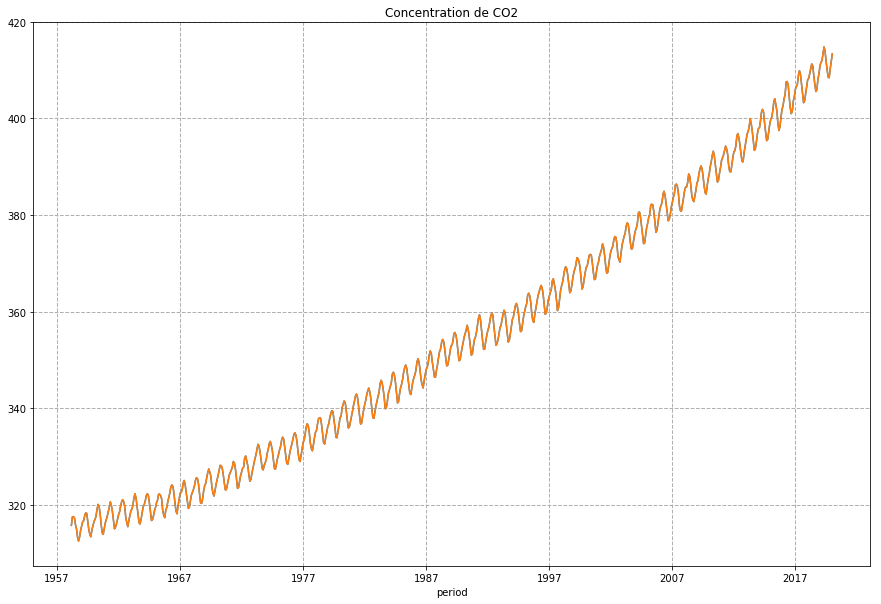

In [7]:
df['s5'].plot(title = 'Concentration de CO2',);
df['s5'].plot(figsize=(15, 10),).grid(linestyle='--', linewidth=1);

Nous allons approximé la concentration de CO2 avec une droite $a*x+b$, puis faire la différence pour 
n'obtenir que les variations de la concentration de CO2.

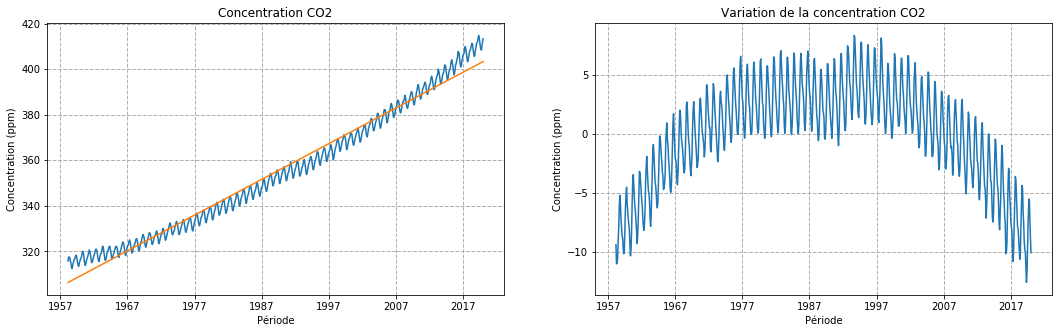

In [8]:
from scipy import stats

a, b, r_value, p_value, std_err = stats.linregress(df['Date 2'], df['s5'])
def predict(x):
    return a*x+b

data_lineaire = df.copy()
data_lineaire['reg_lineaire'] = predict(data_lineaire['Date 2'])

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)
#plot(figsize=(8, 5))  .plot(figsize=(15, 10), grid=True).grid(linestyle='--', linewidth=1);

ax1.set(title = 'Concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(data_lineaire['s5'])
#data1['s1'].plot()
ax1.plot(data_lineaire['reg_lineaire']) 
data_lineaire['co2'] = data_lineaire['reg_lineaire']-data_lineaire['s5']
ax2.set(title = 'Variation de la concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(data_lineaire['co2']); 

Le résultat n'est pas satisfaisant ...
Nous pouvons faire une optimisation avec une fonction de la forme $a*(x-b)^2+c$

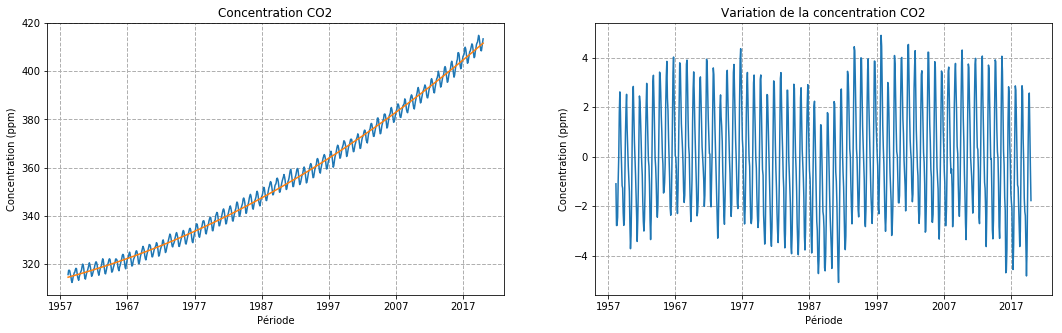

In [9]:
from scipy.optimize import curve_fit

def func_cube(x,a,b,c):
    return a*(x-b)**(2)+c

data_cube = df.copy()
popt, pcov = curve_fit(func_cube,data_cube['Date 2'],data_cube['s5'])

def fcube(x):
    return popt[0]*(x- popt[1])**(2)+popt[2]

data_cube['reg_cube'] = fcube(data_cube['Date 2'])

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(data_cube['s5'])
ax1.plot(data_cube['reg_cube']) 
data_cube['co2'] = data_cube['reg_cube']-data_cube['s5']
ax2.set(title = 'Variation de la concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(data_cube['co2']); 

Nous recherchons l'oscillation lente et rapide, pour cela nous allons opéré en 2 étapes :
- Recherche de ces deux fréquences par FFT. 
- Nous affinons l'estimation de ces fréquences à l'aide d'une  approximation sinusoïdale (fréquence, amplitude, moyenne et phase) par les moindres carrés ordinaires.

Nous considérons pour l'échantillonnage des données un pas constant, correspond à un intervalle de 1 mois  $Te = \frac {1}{12}$. Cet échantillonnage avec le nombre de point de mesure nous donne un échantillonnage en fréquence, ce pas est $\frac {1} {(N*Te)} = 0.016 Hz$ 


Utilisation de la fonction np.fft.fft pour transposer le signal temporel en signal fréquentiel à l’aide de la transformée de Fourier rapide. Le résultat $s5_fft$ est un tableau de nombres complexes. La densité spectrale de puissance est calculée à l’aide de l'estimateur appelé le périodogramme $ \hat{S}_{s5} = \frac {T_e}{N}|s5\_ fft|^2 $  . Les fréquences sont ensuite calculées à l’aide de la fonction np.fft.fftfreq.

Pas d'echantillonnage en fréquence : 0.016150740242261104


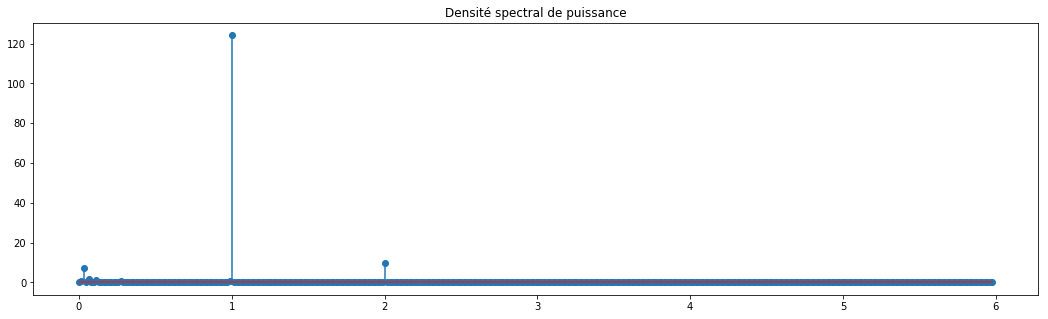

In [11]:
s5 = data_cube.co2 - data_cube.co2.mean()
s5_fft = np.fft.fft(s5)              # calcul de la transformee de Fourier et des frequences

n = s5.size
dt = 1/12
pds_s5 = (dt/n) * np.abs(s5_fft)**2  # densité spectral de puissance
freq = np.fft.fftfreq(n, d=dt)       # fréquences associées

f1 = 1/(n*dt)
print(f'Pas d\'echantillonnage en fréquence : {f1}')

freq = freq[:int(n/2)]
pds_s5 = pds_s5[:int(n/2)]
plt.figure(figsize=(18,5))
plt.title("Densité spectral de puissance")
plt.stem(freq, pds_s5);

Finalement, seules les 'moitiés droites' des tableaux sont conservées car les gauches contiennent les fréquences négatives.

In [12]:
indide_f = np.where(pds_s5 > 5)
f_lente = indide_f[0][0] * f1
indide_f = np.where(pds_s5 > 20)
f_rapide = indide_f[0][-1] * f1
                    
print(f' Estimation de la frequence lente : {f_lente} \n Esitmation de la fréquence rapide : {f_rapide}')

 Estimation de la frequence lente : 0.03230148048452221 
 Esitmation de la fréquence rapide : 1.0013458950201883


In [13]:
def my_sin(x, f, amplitude, phase, offset):
    return np.sin(x * f * 2 * np.pi + phase) * amplitude + offset

# Estimation pour la variation lente
f0 = f_lente   
ampl0= 1
phase0 = 0
offset0 = 0

p0 = [f0,ampl0,phase0,offset0]
x = np.array(data_cube['Date 2'])
popt_l, pcov_l = curve_fit(my_sin, x , s5, p0 = p0)
print(popt_l)
ylent = my_sin(x,popt_l[0],popt_l[1],popt_l[2],popt_l[3])
fl = p0[0]

# Estimation pour la variation rapide
f0 = f_rapide  
ampl0= 3.5
p0 = [f0,ampl0,phase0,offset0]
popt_r, pcov_r = curve_fit(my_sin, x , s5, p0 = p0)
print(popt_r)
yrapide = my_sin(x,popt_r[0],popt_r[1],popt_r[2],popt_r[3])  
fr = p0[0]

[ 2.94262259e-02 -7.52502508e-01  3.62279222e+01 -6.65764876e-02]
[1.00045982 2.84665915 3.31165223 0.00948579]


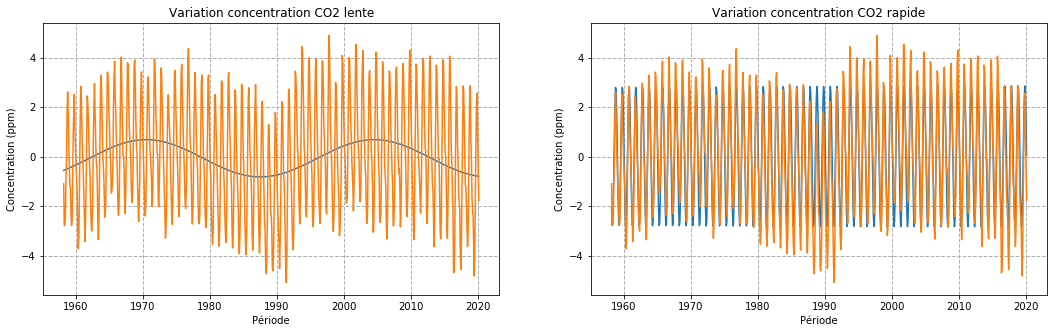

In [14]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Variation concentration CO2 lente',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(x,ylent,x,s5);
ax2.set(title = 'Variation concentration CO2 rapide',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(x,yrapide,x,s5);

In [15]:
print(f' Période lente {1/fl}\n Période rapide {1/fr}')

 Période lente 30.958333333333332
 Période rapide 0.9986559139784947


Nous avons pour la variation lente une fréquence de 0.0294 Hz et pour la variation rapide de 1.0004 Hz. Sachant que 1 Hz 
représente 1 an, nous avons un peu plus d'un an pour la variation rapide, et pour la variation lente une période d'environ 34 ans.

In [16]:
df1 = pd.crosstab(df['Yr'],df['Mn'],values=df['s5'],aggfunc=pd.Series)
df1

Mn        1       2       3       4       5       6       7       8       9   \
Yr                                                                             
1958     NaN     NaN  315.70  317.45  317.51  317.24  315.86  314.93  313.21   
1959  315.58  316.49  316.65  317.72  318.29  318.15  316.54  314.80  313.84   
1960  316.43  316.98  317.58  319.03  320.04  319.59  318.18  315.90  314.17   
1961  316.89  317.70  318.54  319.48  320.58  319.77  318.57  316.79  314.99   
1962  317.94  318.55  319.68  320.57  321.02  320.62  319.61  317.40  316.25   
1963  318.74  319.07  319.86  321.38  322.25  321.48  319.74  317.77  316.21   
1964  319.57  320.01  320.74  321.83  322.26  321.89  320.44  318.69  316.71   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2014  397.93  398.10  399.47  401.33  401.88  401.31  399.07  397.21  395.40   
2015  399.85  400.31  401.51  403.45  404.10  402.88  401.61  399.00  397.50   
2016  402.65  404.16  404.85  407.57  407.66  407.00  404.50  402.24  401.01   
2017  406.07  406.64  407.06  408.95  409.91  409.12  407.20  405.24  403.27   
2018  408.05  408.34  409.25  410.30  411.30  410.88  408.90  407.10  405.59   
2019  410.92  411.66  412.00  413.52  414.83  413.96  411.85  410.08  408.55   
2020  413.37     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Mn        10      11      12  
Yr                            
1958  312.44  313.33  314.67  
1959  313.33  314.81  315.58  
1960  313.83  315.00  316.19  
1961  315.31  316.10  317.01  
1962  315.42  316.69  317.70  
1963  315.99  317.07  318.35  
1964  316.87  317.68  318.71  
...      ...     ...     ...  
2014  395.65  397.23  398.79  
2015  398.28  400.24  401.89  
2016  401.50  403.64  404.55  
2017  403.64  405.17  406.75  
2018  405.99  408.12  409.23  
2019  408.43  410.28  411.85  
2020     NaN     NaN     NaN  

[63 rows x 12 columns]

In [17]:
df1.describe()

Mn             1           2           3           4           5           6   \
count   62.000000   61.000000   62.000000   62.000000   62.000000   62.000000   
mean   355.559355  355.375574  355.535484  356.896613  357.509355  356.924839   
std     28.938877   28.209759   28.425552   28.578804   28.657777   28.563221   
min    315.580000  316.490000  315.700000  317.450000  317.510000  317.240000   
25%    329.612500  330.710000  330.595000  331.787500  332.632500  332.115000   
50%    353.210000  353.070000  352.950000  354.505000  354.945000  354.460000   
75%    377.952500  377.370000  377.820000  379.787500  380.052500  379.195000   
max    413.370000  411.660000  412.000000  413.520000  414.830000  413.960000   

Mn             7           8           9           10          11          12  
count   62.000000   62.000000   62.000000   62.000000   62.000000   62.000000  
mean   355.428871  353.441129  351.778871  351.775806  353.175645  354.473387  
std     28.395757   28.315031   28.340139   28.507786   28.700183   28.819885  
min    315.860000  314.800000  313.210000  312.440000  313.330000  314.670000  
25%    330.947500  329.330000  327.450000  327.227500  328.235000  328.872500  
50%    353.140000  351.050000  349.270000  349.435000  350.685000  351.930000  
75%    377.470000  375.492500  373.782500  373.915000  375.467500  377.002500  
max    411.850000  410.080000  408.550000  408.430000  410.280000  411.850000

In [32]:
m = df['Date 2'] - df['Yr']
df2 = pd.crosstab(df['Yr'],df['Mn'],values= m,aggfunc=pd.Series)
df2.head(5)

Mn        1       2       3       4       5       6       7       8       9   \
Yr                                                                             
1958     NaN     NaN  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   
1959  0.0411  0.1260  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   
1960  0.0410  0.1257  0.2049  0.2896  0.3716  0.4563  0.5383  0.6230  0.7077   
1961  0.0411  0.1260  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   
1962  0.0411  0.1260  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   

Mn        10      11      12  
Yr                            
1958  0.7890  0.8740  0.9562  
1959  0.7890  0.8740  0.9562  
1960  0.7896  0.8743  0.9563  
1961  0.7890  0.8740  0.9562  
1962  0.7890  0.8740  0.9562

On observe pour certaine année un pas différent à partir du mois de février cela est du aux années bissextiles. Dans l'intervalle d'extrapolation, nous avons l'année 2020 et 2024 en année bissextile.

Nous créons une nouvelle DataFrame pour l'interpolation, elle ne contient que les colonnes nécessaire à l'extrapolation.

In [274]:
dfa = df[['Yr','Mn','Date 2','s5']]
an_b = df2.loc[1960, : ]
an_n = df2.loc[1961, : ]
year, mois = dfa[-1:]['Yr'].values, dfa[-1:]['Mn'].values
#for val in per1: 
#    print(val.date()) 

2020

In [327]:
# Année de fin d'extrapolation 
ymj_fin = datetime.date(2025, 12, 1)

ymj = df[-1:].index[0].isoformat() 
per1 = pd.date_range(start = ymj,end =ymj_fin, freq=pd.DateOffset(months=1))
Yr = pd.Series([q.year for q in per1],index = per1 )
Mn = pd.Series([q.month for q in per1],index = per1)
    
s = []         # oblication d'initialiser ....
[s.extend(list(an_n)) if i%4!=0 else s.extend(list(an_b))  for i in np.arange(ymj_fin.year- year[0]+1)]
Data2 = pd.Series(s,index = per1)
dfa = pd.DataFrame({'Yr' : Yr,'Mn' : Mn,'Data 2' : Data2 + Yr})
#dfa = pd.DataFrame({'Data2' : Data2})
dfa

Data 2  Mn    Yr
2020-01-01  2020.0410   1  2020
2020-02-01  2020.1257   2  2020
2020-03-01  2020.2049   3  2020
2020-04-01  2020.2896   4  2020
2020-05-01  2020.3716   5  2020
2020-06-01  2020.4563   6  2020
2020-07-01  2020.5383   7  2020
...               ...  ..   ...
2025-06-01  2025.4548   6  2025
2025-07-01  2025.5370   7  2025
2025-08-01  2025.6219   8  2025
2025-09-01  2025.7068   9  2025
2025-10-01  2025.7890  10  2025
2025-11-01  2025.8740  11  2025
2025-12-01  2025.9562  12  2025

[72 rows x 3 columns]